# Data Exploration with Descriptive Statistics and Visualizations

This exercise covers the following concepts:
- Descriptive statistics and their interpretation
- Visualizations for data exploration

## Data for this exercise

We use the boston house price data in this exercise. The data is available as part of ```sklearn``` for [Python](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

## Descriptive statistics of the boston data

Explore the boston data using descriptive statistics. Calculate the central tendency with the mean and median, the variability through the standard deviation and the IQR, as well as the range of the data. The real task is understanding something about the data from these results. For example, what can you learn about the CRIM feature from the mean and the median?

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.datasets import *

%matplotlib inline

In [5]:
boston = load_boston()
#print(boston.data.shape)
#print(type(boston))
#print(dir(boston))
#print(boston.DESCR)
#print(boston.feature_names)
#print([type(getattr(boston, name)).__name__ for name in dir(boston) ])
#print([type(boston[x]) for x in boston.keys()])

In [6]:
bos= pd.DataFrame(boston.data, columns= boston.feature_names)

In [7]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
bos['PRICE'] = boston.target

In [9]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [10]:
bos.shape

(506, 14)

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


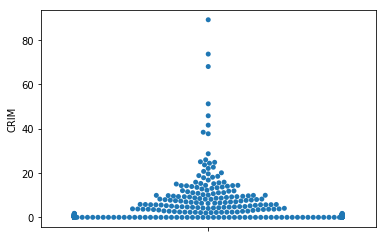

In [28]:
sns.swarmplot(y= bos["CRIM"]   )

In [10]:
# check that no values are missing
bos.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Visualizations

The Python library ```matplotlib``` is great for creating all kinds of visualizations. There are even libraries on top of ```matplotlib``` that facilitate relatively complex visualizations in a single line of code, like ```seaborn```. 


### Analyze single features of the boston data

Visually analyze features ```zn``` and ```indus``` of the boston data. Use the techniques described in the lecture, i.e., histograms and density plots (with/without rugs). What can you learn about these features from these plots? What are the advantages and drawbacks of the different plots for this data?

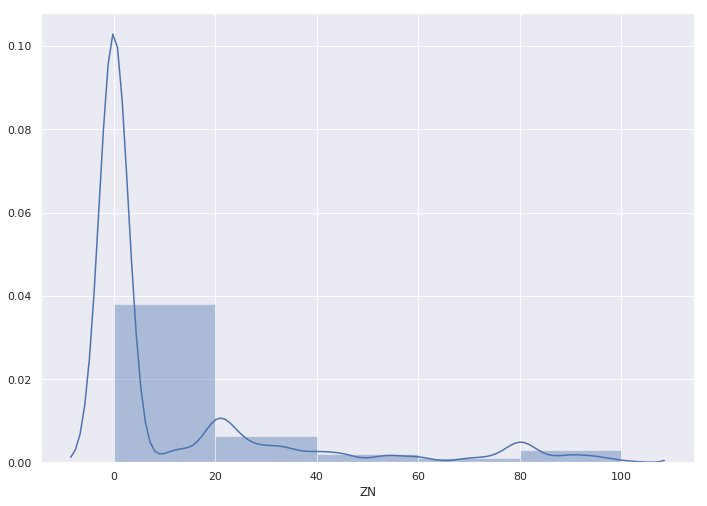

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot((bos['ZN']), bins=5)
plt.show()

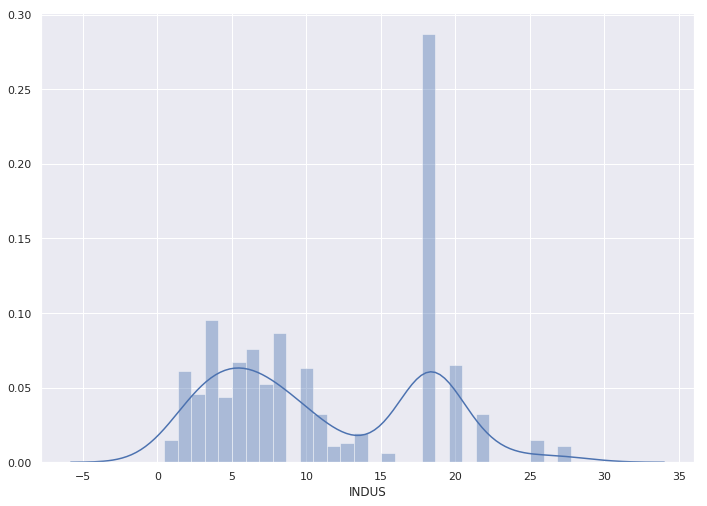

In [84]:
sns.distplot((bos['INDUS']),30)
plt.show()

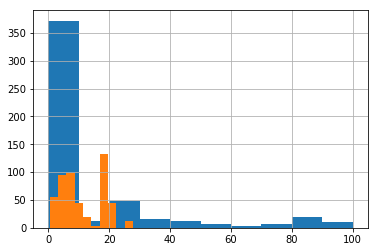

In [26]:
bos["ZN"].hist()
bos["INDUS"].hist()

### Analyze the pair-wise relationships between the features of the boston data

Next, analyze the pair-wise relationships between all fourteen features of the boston data. First, analyze their relationship through scatter plots. Then, create a heatmap of the correlations between the features. What did you learn about the data?

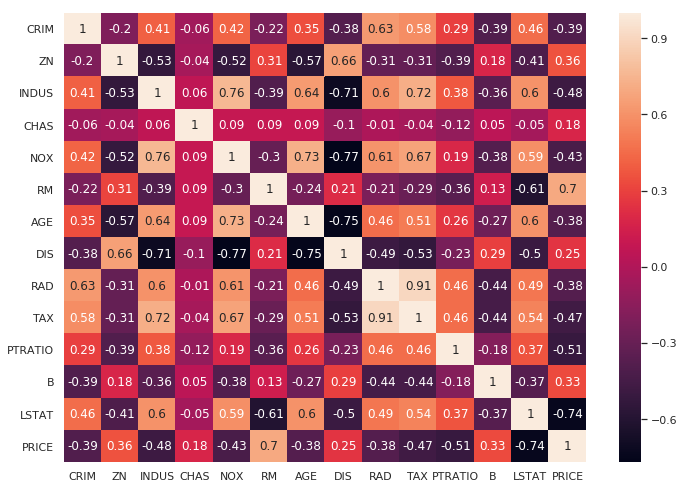

In [86]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Bonus Task (will not be discussed during the exercise)

Try to create all plots from the visualization lecture.